# Heart Disease EDA & Modelling

# 1000 AI Engineers Initiative ( Eng.\ Hisham Essam )

## https://1000ml.co.uk



**Contributors:**

- Maissara Mohamed Mostafa (X1545)
- Ebrahem mostafa ebrahem  (X1797)
- Nour Elrahman Maher Abd Elrahman (X1667)
- Ahmed Kaoud Ahmed (x1738)



28-January-2023

## importing libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

## Reading the dataset

In [3]:
df=pd.read_csv('heart_2020_cleaned.csv')
data=df

## Data Exploration

In [4]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [5]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [91]:
df.shape

(319795, 18)

In [92]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [93]:
#checking the frequency counts of variables.
for col in data.columns:
    
    print(f"""
###########################################################################################
The values of {col} is : 
{data[col].value_counts().sort_index()}
###########################################################################################""")


###########################################################################################
The values of HeartDisease is : 
No     292422
Yes     27373
Name: HeartDisease, dtype: int64
###########################################################################################

###########################################################################################
The values of BMI is : 
12.02    2
12.08    1
12.13    1
12.16    1
12.20    1
        ..
92.53    1
93.86    1
93.97    1
94.66    1
94.85    1
Name: BMI, Length: 3604, dtype: int64
###########################################################################################

###########################################################################################
The values of Smoking is : 
No     187887
Yes    131908
Name: Smoking, dtype: int64
###########################################################################################

###################################################################################

==> There are 17 variables in the dataset. All the variables are of categorical and numerical data type.

==> Class "HeartDisease" is the target variable.


In [94]:
data.groupby("HeartDisease")['Sex'].value_counts(normalize=True)*100

HeartDisease  Sex   
No            Female    53.542825
              Male      46.457175
Yes           Male      58.959559
              Female    41.040441
Name: Sex, dtype: float64

In [95]:
data.groupby("Smoking")['Sex'].value_counts(normalize=True)*100

Smoking  Sex   
No       Female    56.031551
         Male      43.968449
Yes      Male      52.596507
         Female    47.403493
Name: Sex, dtype: float64

In [96]:
data.groupby("AlcoholDrinking")['Sex'].value_counts(normalize=True)*100

AlcoholDrinking  Sex   
No               Female    52.529377
                 Male      47.470623
Yes              Female    51.696744
                 Male      48.303256
Name: Sex, dtype: float64

### Checking nulls values in dataframe
the data hasn't null values

In [97]:
df.isna().sum() 

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

### looking for one row 


In [98]:
#looking for one row
df.iloc[0]

HeartDisease               No
BMI                      16.6
Smoking                   Yes
AlcoholDrinking            No
Stroke                     No
PhysicalHealth            3.0
MentalHealth             30.0
DiffWalking                No
Sex                    Female
AgeCategory             55-59
Race                    White
Diabetic                  Yes
PhysicalActivity          Yes
GenHealth           Very good
SleepTime                 5.0
Asthma                    Yes
KidneyDisease              No
SkinCancer                Yes
Name: 0, dtype: object

## Data Visualization

### What is the overall ratio of Heart Disease ?

C:\Users\nour\AppData\Local\Temp\ipykernel_7976\3903939798.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


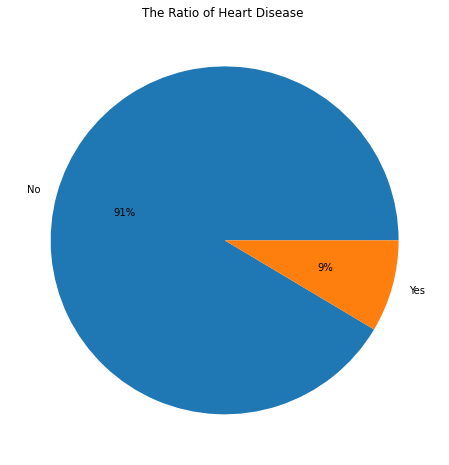

In [99]:
fig, ax = plt.subplots(1, 1,figsize =(15, 8))
ax.pie(data['HeartDisease'].value_counts(),autopct='%1.0f%%',labels=['No',"Yes"])
ax.set_title('The Ratio of Heart Disease ')
fig.show()

### What is the relation between heart disease, skin cancer & kidney disease Vs the age ?

In [100]:
encode_AgeCategory = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}
data['AgeCategory'] = data['AgeCategory'].apply(lambda x: encode_AgeCategory[x])
data['AgeCategory'] = data['AgeCategory'].astype('float')

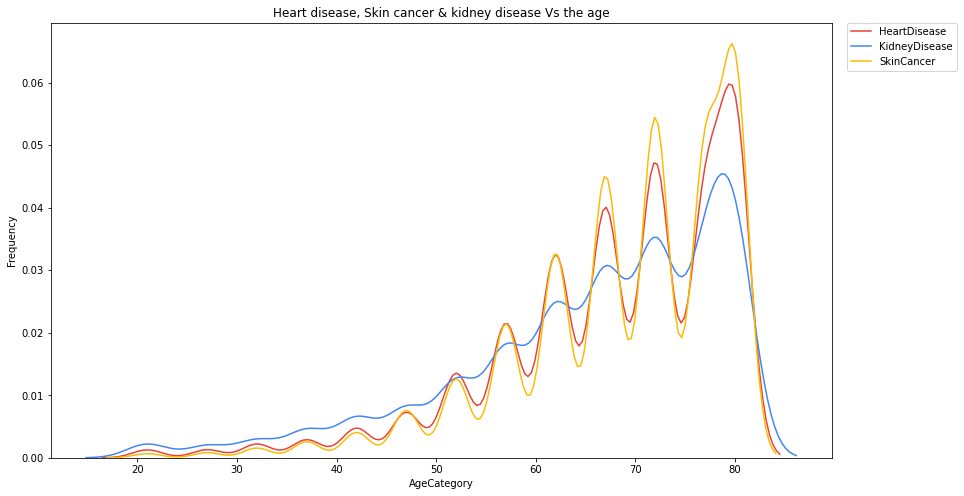

In [101]:
fig, ax = plt.subplots(figsize = (14,8))

sns.kdeplot(data[data["HeartDisease"]=='Yes']["AgeCategory"], alpha=1,shade = False, color="#ea4335", label="HeartDisease", ax = ax)
sns.kdeplot(data[data["KidneyDisease"]=='Yes']["AgeCategory"], alpha=1,shade = False, color="#4285f4", label="KidneyDisease", ax = ax)
sns.kdeplot(data[data["SkinCancer"]=='Yes']["AgeCategory"], alpha=1,shade = False, color="#fbbc05", label="SkinCancer", ax = ax)

ax.set_xlabel("AgeCategory")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title('Heart disease, Skin cancer & kidney disease Vs the age')
plt.show()

==> People found to have heart disease, skin cancer & kidney disease are mostly old people

### The relation between Heart Disease & Sex

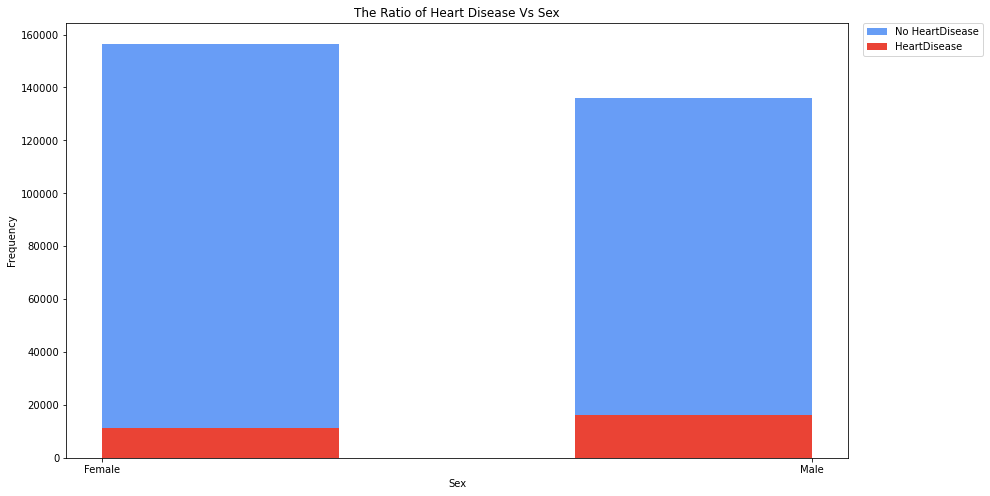

In [102]:
fig, ax = plt.subplots(figsize = (14,8))

ax.hist(data[data["HeartDisease"]=='No']["Sex"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(data[data["HeartDisease"]=='Yes']["Sex"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")
plt.title('The Ratio of Heart Disease Vs Sex')
ax.set_xlabel("Sex")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)


In [103]:
female_with_heart_disease = len(data[(data['HeartDisease']=='Yes') & (data['Sex']=='Female')])
num_female = len(data[data['Sex']=='Female'])
male_with_heart_disease = len(data[(data['HeartDisease']=='Yes') & (data['Sex']=='Male')])
num_male = len(data[data['Sex']=='Male'])
print('Probability of Male to have Heart disease:', male_with_heart_disease/num_male)
print('Probability of Female to have Heart disease:', female_with_heart_disease/num_female)

Probability of Male to have Heart disease: 0.10618461740904007
Probability of Female to have Heart disease: 0.06694675367241738


==> Most heart disease patients are Male than Females

==> More Females were tested than males

==> Males are approximately 1.6 times more likely to have heart disease than females


### What is the effect of smoking in Heart disease ?


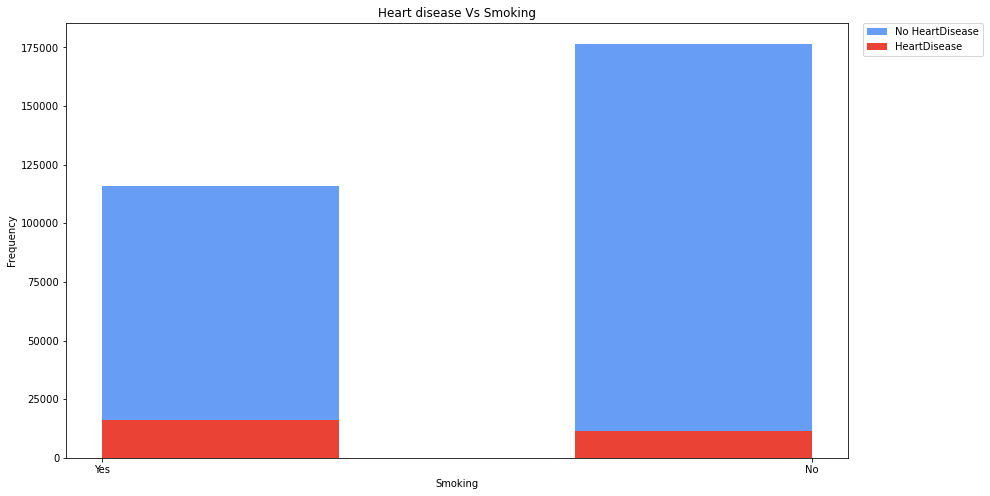

In [104]:
fig, ax = plt.subplots(figsize = (14,8))

ax.hist(data[data["HeartDisease"]=='No']["Smoking"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(data[data["HeartDisease"]=='Yes']["Smoking"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Smoking")
ax.set_ylabel("Frequency")
plt.title('Heart disease Vs Smoking')
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

In [105]:
smoke_and_heart_disease = len(data[(data['HeartDisease']=='Yes') & (data['Smoking']=='Yes')])
num_smoke = len(data[data['Smoking']=='Yes'])
no_smoke_and_heart_disease = len(data[(data['HeartDisease']=='Yes') & (data['Smoking']=='No')])
num_no_smoke = len(data[data['Smoking']=='No'])
print('Probability of Heart disease if you smoke:', smoke_and_heart_disease/num_smoke)
print("Probability of Heart disease if you don't smoke:", no_smoke_and_heart_disease/num_no_smoke)

Probability of Heart disease if you smoke: 0.12157715983867544
Probability of Heart disease if you don't smoke: 0.0603341370078824


==> Most heart disease patients smoke

==> People who smoke are approximately twice as likely to have heart disease than people who don't smoke


---



---



### What is the relation of Heart disease Vs the race ?


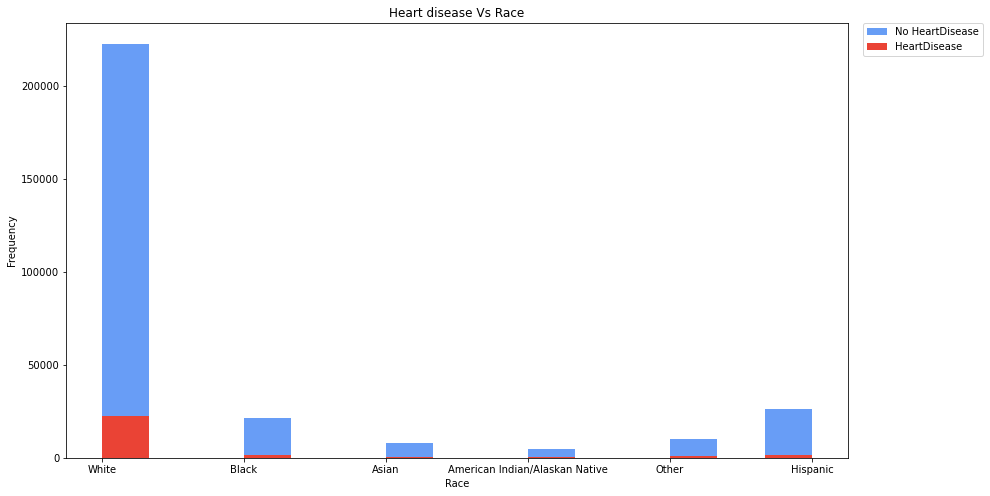

In [106]:
fig, ax = plt.subplots(figsize = (14,8))

ax.hist(data[data["HeartDisease"]=='No']["Race"], bins=15, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(data[data["HeartDisease"]=='Yes']["Race"], bins=15, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Race")
ax.set_ylabel("Frequency")
plt.title('Heart disease Vs Race')
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

==> Most Heart Disease Patients are White people


---



---



### does the general health affect to Heart disease ?

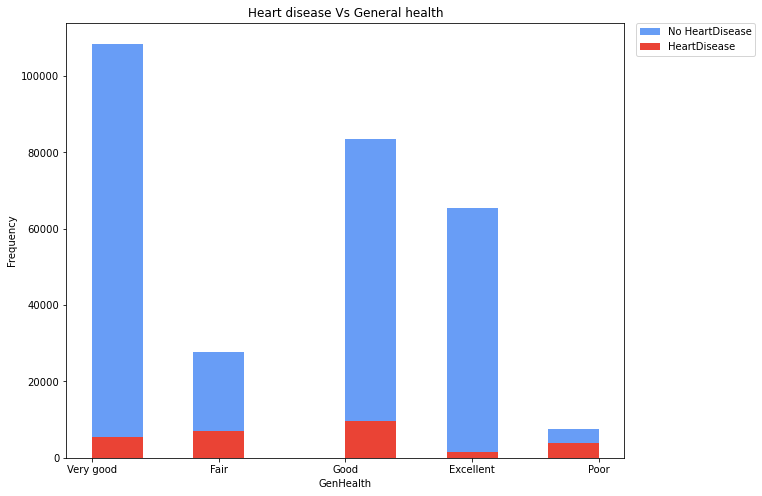

In [107]:
fig, ax = plt.subplots(figsize = (10,8))

ax.hist(data[data["HeartDisease"]=='No']["GenHealth"], bins=10, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(data[data["HeartDisease"]=='Yes']["GenHealth"], bins=10, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("GenHealth")
ax.set_ylabel("Frequency")
plt.title('Heart disease Vs General health')
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

==> Most poor general health Patients have high heart Disease

### What is the relation of Heart disease & BMI

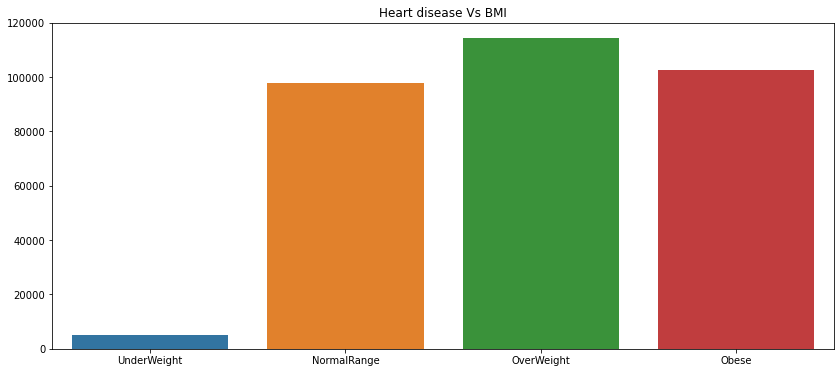

In [108]:
# classification of BMI (Body Mass Index) by ranges :
BMI_UnderWeight = data['BMI'][(data['BMI']>=0) & (data['BMI'] <= 18.5)]
BMI_NormalRange = data['BMI'][(data['BMI']>18.5) & (data['BMI'] <= 25)]
BMI_OverrWeight = data['BMI'][(data['BMI']>25) & (data['BMI'] <= 30)]
BMI_Obese = data['BMI'][(data['BMI']>30)]

BMI_X = ['UnderWeight','NormalRange','OverWeight','Obese']
BMI_Y = [len(BMI_UnderWeight.values),len(BMI_NormalRange.values),len(BMI_OverrWeight.values),len(BMI_Obese.values)]

plt.figure(figsize = (14,6))
sns.barplot (x = BMI_X, y = BMI_Y)
plt.title('Heart disease Vs BMI')
plt.show()

<AxesSubplot:>

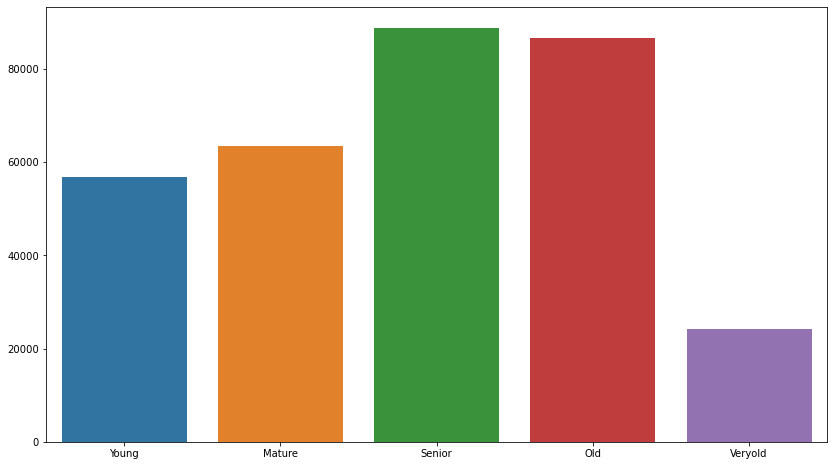

In [109]:
# classification of Age Category by ranges :
Young   = data['AgeCategory'][(data['AgeCategory'] <= 32.0)]
Mature  = data['AgeCategory'][(data['AgeCategory'] >= 37.0) & (data['AgeCategory'] <= 47.0)]
Senior  = data['AgeCategory'][(data['AgeCategory'] >= 52.0) & (data['AgeCategory'] <= 62.0)]
Old     = data['AgeCategory'][(data['AgeCategory'] >= 67.0) & (data['AgeCategory'] <= 77.0)]
Veryold = data['AgeCategory'][(data['AgeCategory'] == 80.0)]

Age_X = ['Young','Mature','Senior','Old','Veryold']
Age_Y = [len(Young.values),len(Mature.values),len(Senior.values),len(Old.values),len(Veryold.values)]

plt.figure(figsize = (14,8))
sns.barplot (x = Age_X, y = Age_Y)

<AxesSubplot:xlabel='Smoking', ylabel='count'>

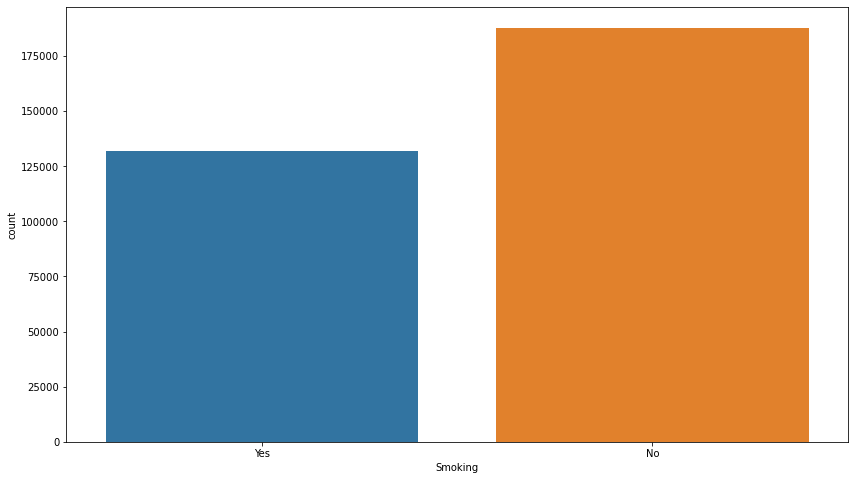

In [110]:
plt.figure(figsize = (14,8))
sns.countplot(data=data,x="Smoking")

<AxesSubplot:xlabel='AlcoholDrinking', ylabel='count'>

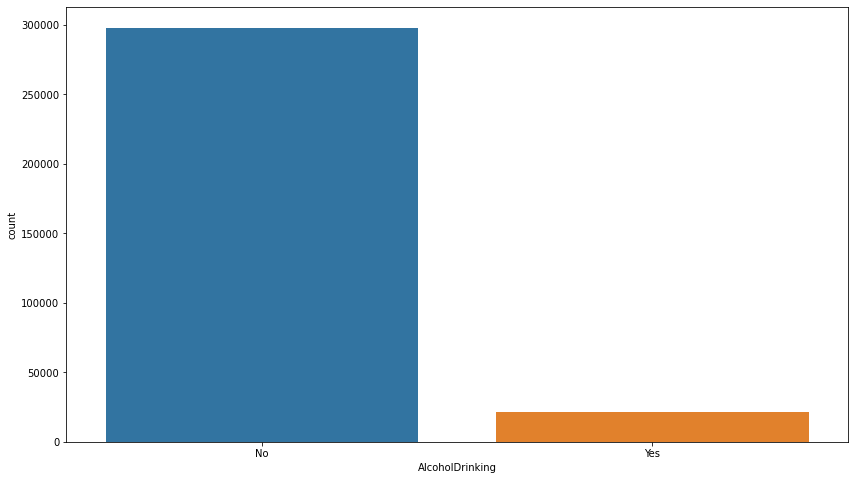

In [111]:
plt.figure(figsize = (14,8))
sns.countplot(data=data,x="AlcoholDrinking")

<AxesSubplot:xlabel='Stroke', ylabel='count'>

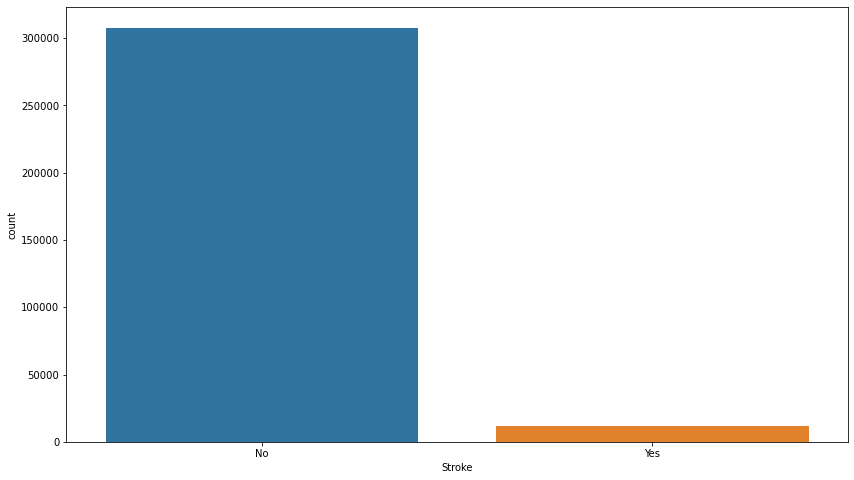

In [112]:
plt.figure(figsize = (14,8))
sns.countplot(data=data,x="Stroke")

<AxesSubplot:xlabel='Sex', ylabel='count'>

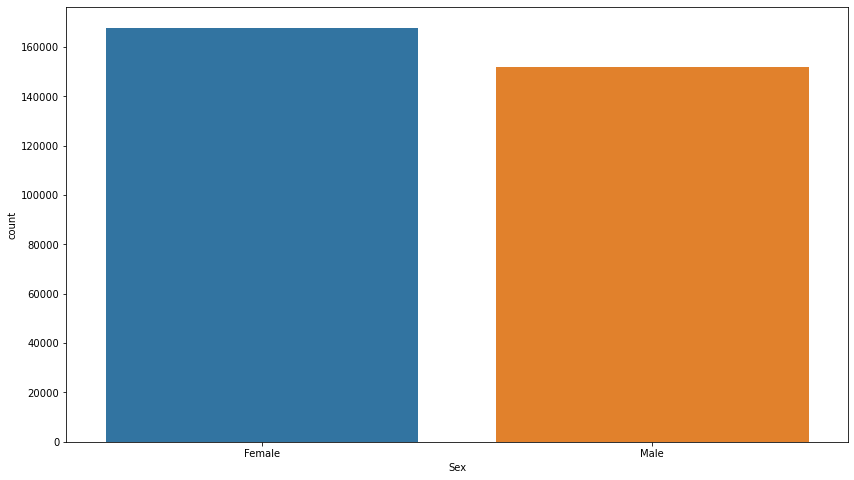

In [113]:
plt.figure(figsize = (14,8))
sns.countplot(data=data,x="Sex")

<AxesSubplot:xlabel='AgeCategory', ylabel='count'>

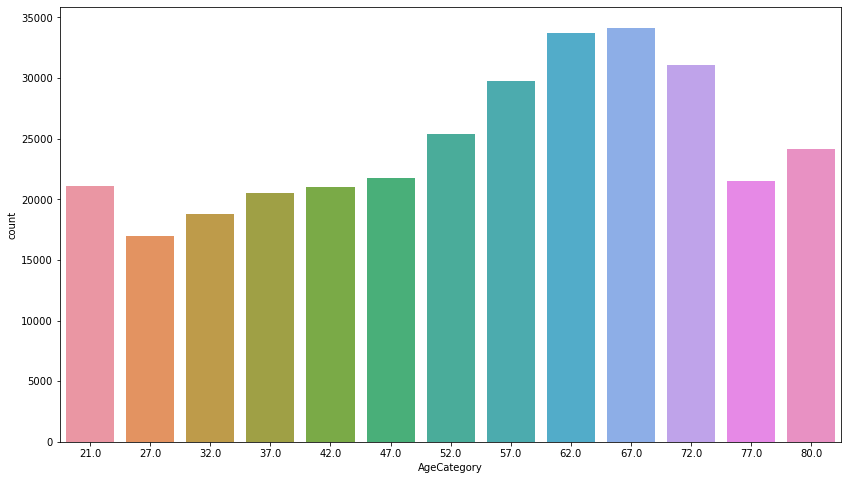

In [114]:
plt.figure(figsize = (14,8))
sns.countplot(data=data,x="AgeCategory")
# 20          21064
# 27          16955
# 32          18753
# 37          20550
# 42          21006
# 47          21791
# 52          25382
# 57          29757
# 62          33686
# 67          34151
# 72          31065
# 77          21482
# 80          24153

<AxesSubplot:xlabel='Race', ylabel='count'>

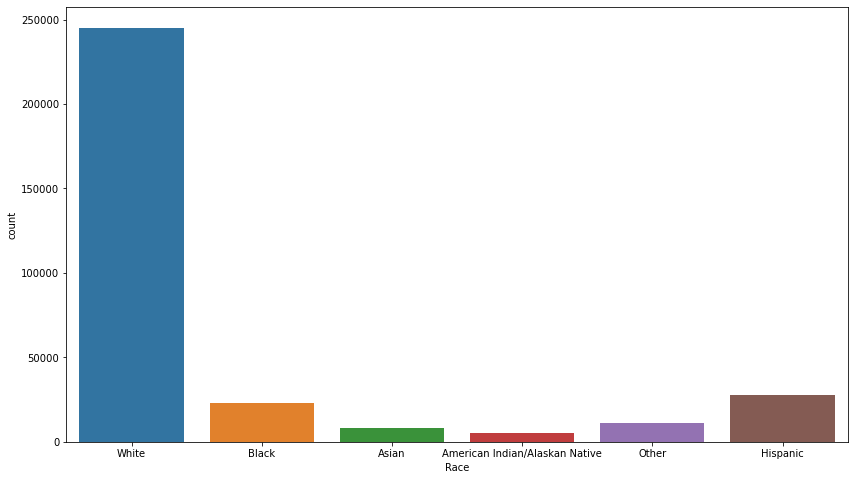

In [115]:
plt.figure(figsize = (14,8))
sns.countplot(data=data,x="Race")
# American Indian/Alaskan Native      5202
# Asian                               8068
# Black                              22939
# Hispanic                           27446
# Other                              10928
# White                             245212

<AxesSubplot:xlabel='Diabetic', ylabel='count'>

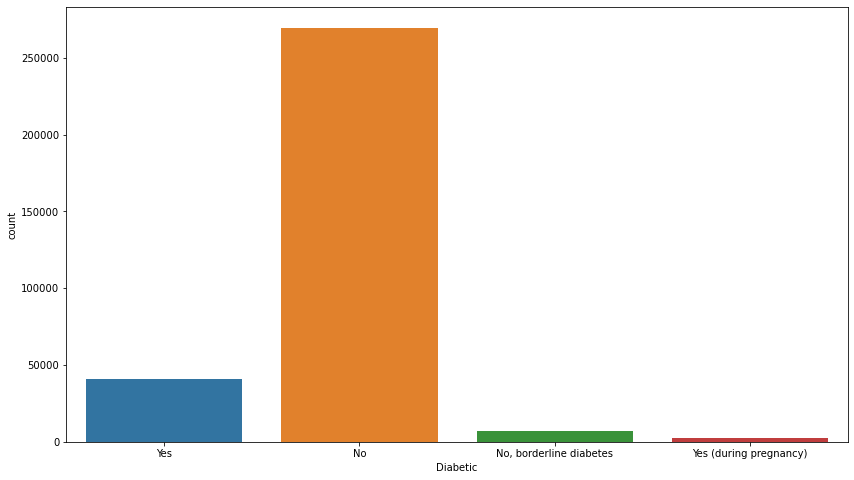

In [116]:
plt.figure(figsize = (14,8))
sns.countplot(data=data,x="Diabetic")
# ==> No                               5202
# ==> No, borderline diabetes          8068
# ==> Yes                              22939
# ==> Yes (during pregnancy)           27446

<AxesSubplot:xlabel='PhysicalActivity', ylabel='count'>

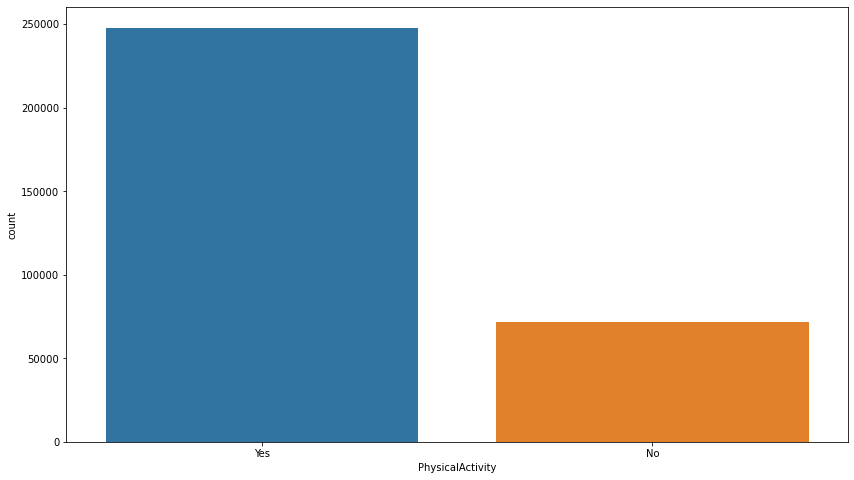

In [117]:
plt.figure(figsize = (14,8))
sns.countplot(data=data,x="PhysicalActivity")
#==> No      71838
#==> Yes    247957

<AxesSubplot:xlabel='GenHealth', ylabel='count'>

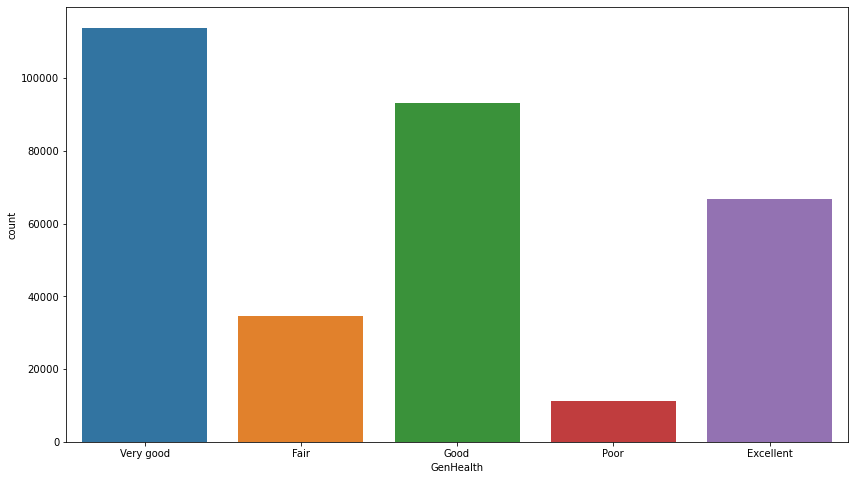

In [118]:
plt.figure(figsize = (14,8))
sns.countplot(data=data,x="GenHealth")
#Excellent     66842
#Fair          34677
#Good          93129
#Poor          11289
#Very good    113858

<AxesSubplot:xlabel='SleepTime', ylabel='count'>

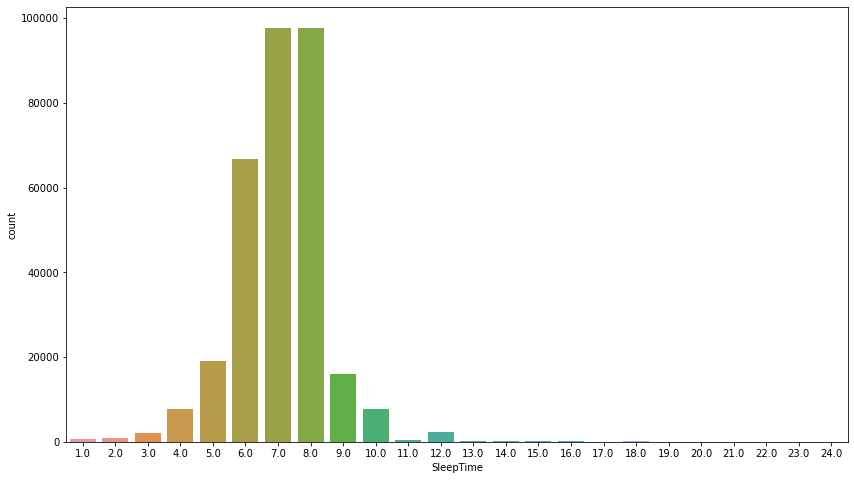

In [119]:
plt.figure(figsize = (14,8))
sns.countplot(data=data,x="SleepTime")

<AxesSubplot:xlabel='Asthma', ylabel='count'>

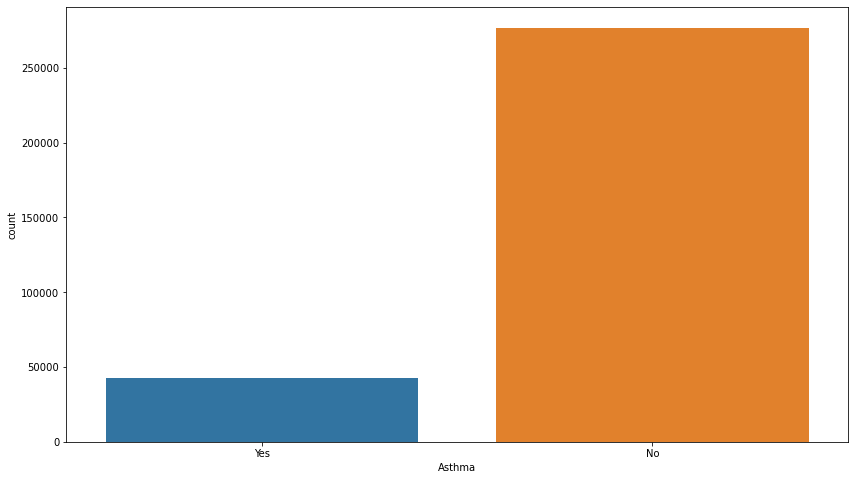

In [120]:
plt.figure(figsize = (14,8))
sns.countplot(data=data,x="Asthma")

<AxesSubplot:xlabel='KidneyDisease', ylabel='count'>

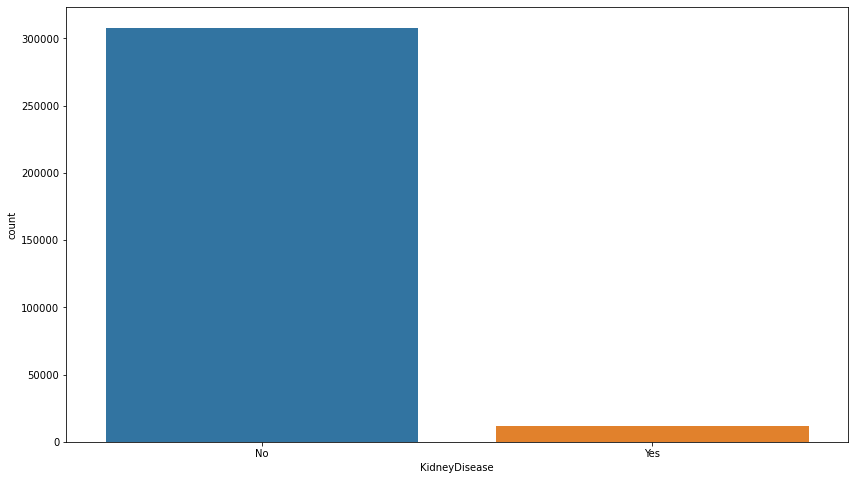

In [121]:
plt.figure(figsize = (14,8))
sns.countplot(data=data,x="KidneyDisease")

<AxesSubplot:xlabel='SkinCancer', ylabel='count'>

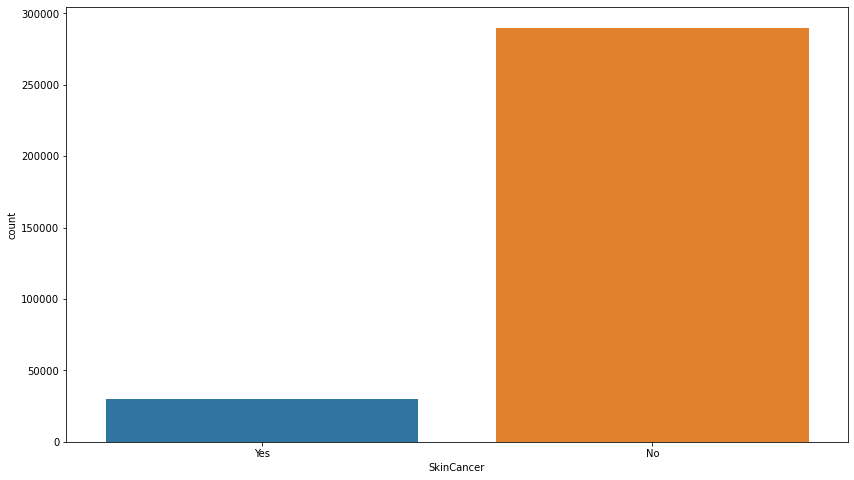

In [122]:
plt.figure(figsize = (14,8))
sns.countplot(data=data,x="SkinCancer")

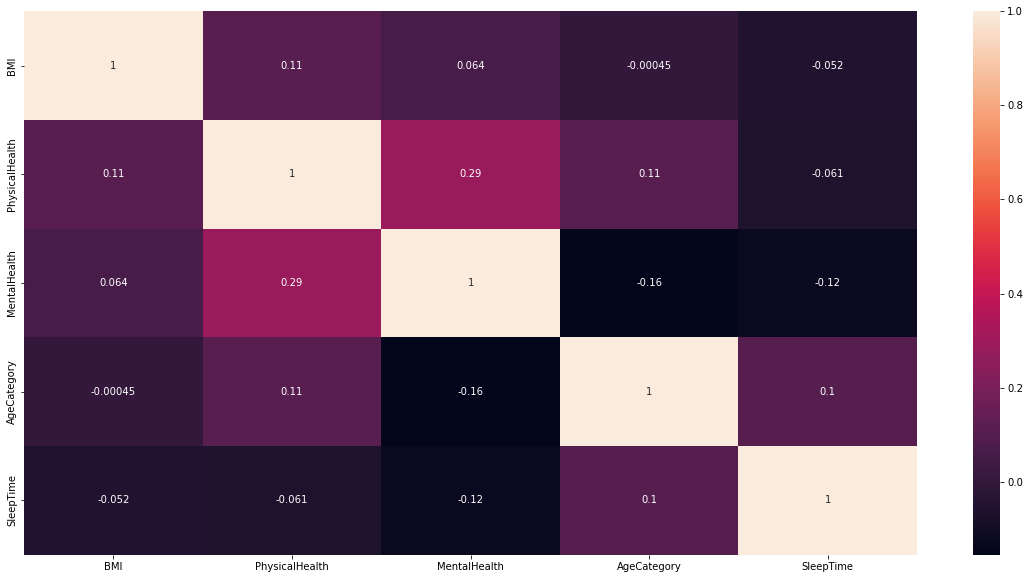

In [123]:
plt.figure(1,figsize=(20,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

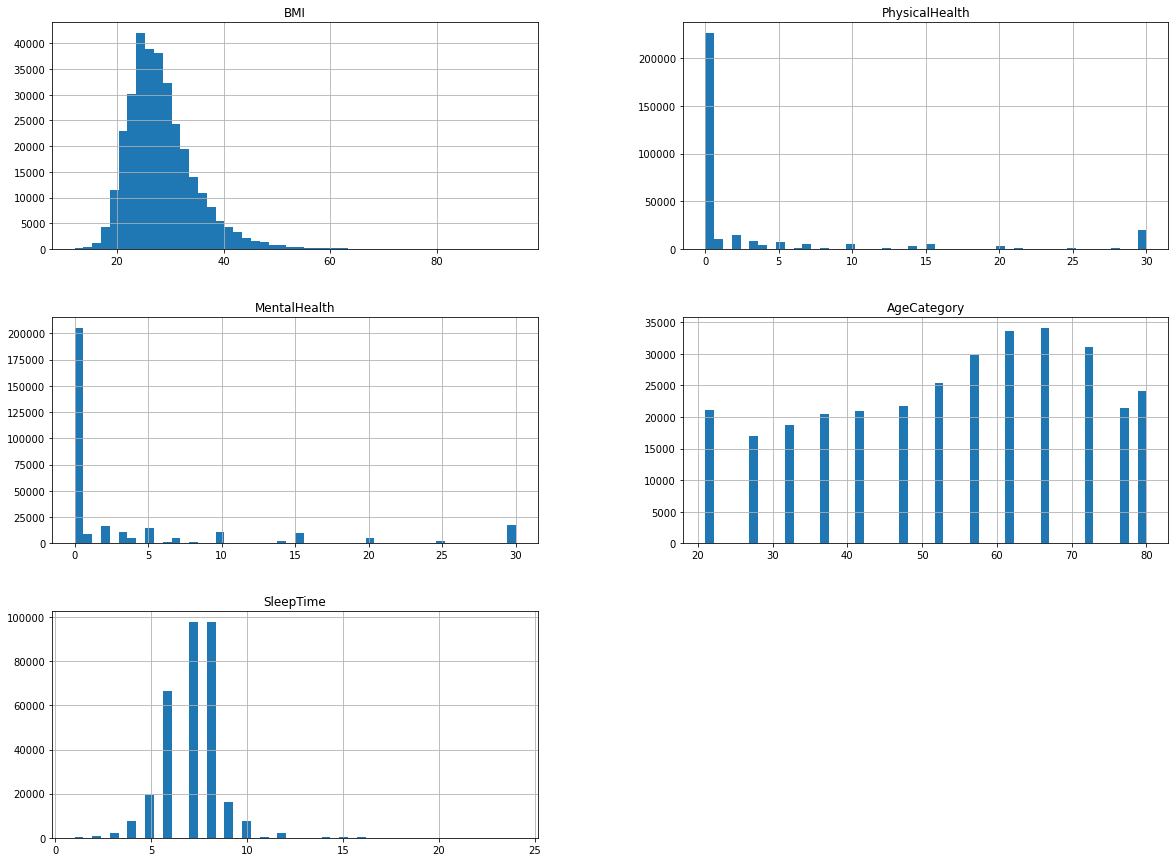

In [124]:
data.hist(bins=50, figsize=(20,15))
plt.show()

## Converting catergical data to numerical

In [6]:
cat_columns = df.select_dtypes(['object']).columns
cat_columns

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [10]:
df_1 = pd.get_dummies(df, columns = cat_columns[1:])

df_1['HeartDisease'].replace({'Yes':1,'No':0},inplace=True)

df_1.head()

,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,0,16.60,3.0,30.0,5.0,0,1,1,0,1,...,0,0,0,1,0,1,1,0,0,1
1,0,20.34,0.0,0.0,7.0,1,0,1,0,0,...,0,0,0,1,1,0,1,0,1,0
2,0,26.58,20.0,30.0,8.0,0,1,1,0,1,...,1,0,0,0,0,1,1,0,1,0
3,0,24.21,0.0,0.0,6.0,1,0,1,0,1,...,0,1,0,0,1,0,1,0,0,1
4,0,23.71,28.0,0.0,8.0,1,0,1,0,1,...,0,0,0,1,1,0,1,0,1,0


In [43]:
X = df_1.drop('HeartDisease',axis=1)
y = df_1['HeartDisease']

# normalization of the dataset
X = preprocessing.StandardScaler().fit(X).transform(X)


## to balancing the heart disease results

In [44]:
from imblearn.over_sampling import SMOTE

over = SMOTE(k_neighbors=2000)
X, y = over.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44, stratify=y)

### to check the balance

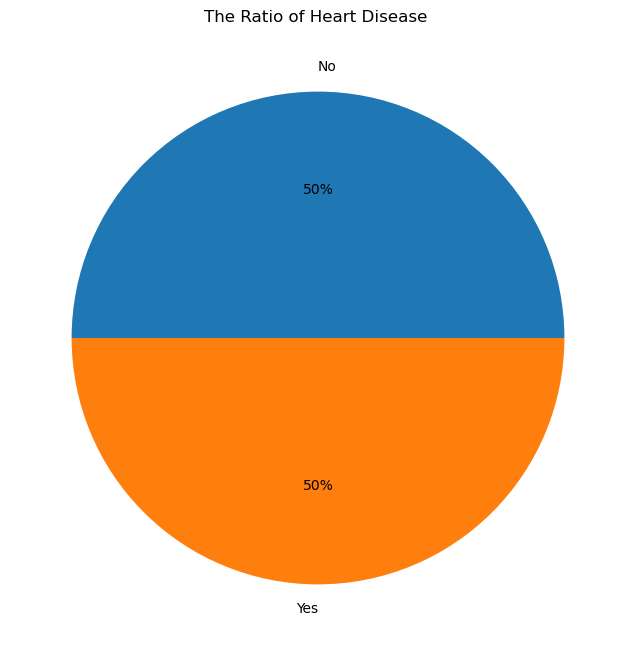

In [45]:
fig, ax = plt.subplots(1, 1,figsize =(15, 8))
ax.pie(y.value_counts(),autopct='%1.0f%%',labels=['No',"Yes"])
ax.set_title('The Ratio of Heart Disease ')
plt.show()

## **Modelling**

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn import metrics

models = {
    "Decision Tree":DecisionTreeClassifier(random_state = 44, max_depth=20),
    "Logistic R.": LogisticRegression(random_state = 44),
    "Naive Bayes C":BernoulliNB(),
    "SVC":SVC(kernel='linear',max_iter=100,C=1.0,gamma='auto'),
    "Random Forest":RandomForestClassifier(random_state = 44, max_depth=20)
}

results = pd.DataFrame(columns=['Model','Recall TP/TP+FN','Precision TP/TP+FP','f1-score','accuracy TP+TN)/all'])
def test_models(X_train, X_test, y_train, y_test):
    for model in models:
        fit = models[model].fit(X_train, y_train)
        fig, ax = plt.subplots(figsize=(6, 4))
        ax.set_title(model)
        metrics.plot_confusion_matrix(fit, X_test, y_test, cmap='Blues', normalize='true', ax=ax)
        plt.show()

        recall = round(metrics.recall_score(y_test, fit.predict(X_test))*100,2) # TP /(TP + FN)
        precision = round(metrics.precision_score(y_test, fit.predict(X_test))*100,2) # TP /(TP + FP)   
        f1 = round(metrics.f1_score(y_test, fit.predict(X_test))*100,2) # F1 = 2 * (precision * recall) / (precision + recall)
        accuracy = accuracy_score(y_test, fit.predict(X_test), normalize=True) # ((TP + TN)/(TP + TN + FP + FN))
        results.loc[len(results.index)] = [model, recall, precision, f1, accuracy]

    

C:\Users\AL Motahida\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


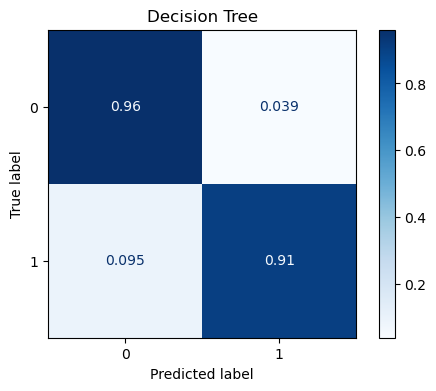

C:\Users\AL Motahida\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


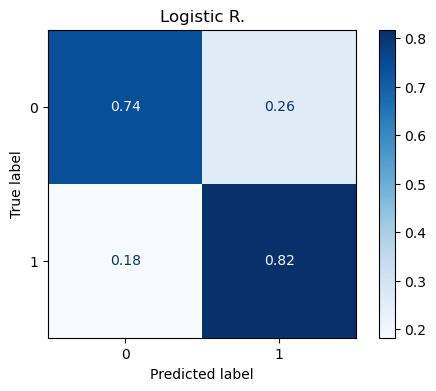

C:\Users\AL Motahida\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


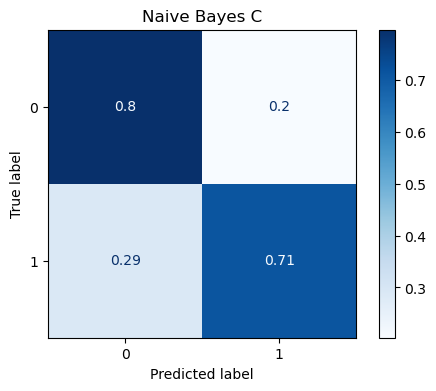

C:\Users\AL Motahida\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\AL Motahida\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


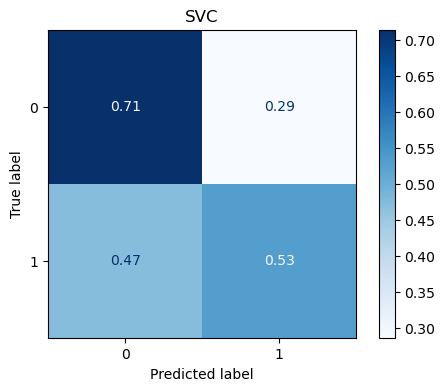

C:\Users\AL Motahida\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


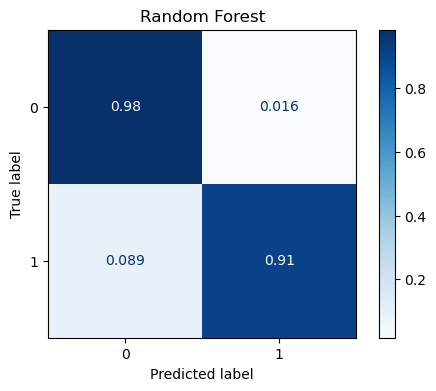

In [47]:
# plot the confusion matrix
test_models(X_train, X_test, y_train, y_test)

# Comparison between models

In [48]:
# Comparison between models by accuracy
results.sort_values('accuracy TP+TN)/all', ascending=False)

,Model,Recall TP/TP+FN,Precision TP/TP+FP,f1-score,accuracy TP+TN)/all
4,Random Forest,91.05,98.28,94.53,0.947282
0,Decision Tree,90.54,95.83,93.11,0.932987
1,Logistic R.,81.74,75.91,78.72,0.779032
2,Naive Bayes C,71.32,77.84,74.43,0.755066
3,SVC,52.93,64.93,58.32,0.621691


**The Random Forest model has the best accuracy but it takes the longest time compared to Decision Tree,The Decision Tree is the best model for accuracy and consumption of resources and time**